In [4]:
# Tested on python 3.6.4 
%matplotlib inline

import numpy as np # 1.13.3
from scipy.integrate import odeint # 1.0.0
import scipy.optimize as op
import scipy.stats as stats
import matplotlib.pyplot as plt # 2.1.1
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator

import pandas as pd # 0.22.0
import emcee # 2.2.1
import corner # 2.0.1
import progressbar # 3.34.3
import seaborn as sns # 0.8.1
from cycler import cycler # 0.10.0

from helper import * # helper.py

print('emcee version', emcee.__version__)

# Directories defined here 
DIR_DATA = './data/'
DIR_PLOTS = './plots/'
DIR_OUT = './output/'

emcee version 2.2.1


This jupyter notebook plots the results of MCMC fits to the binding site tuning data from the 2018 Swank et al. paper. The code in this notebook requires the following data files, which are located in `DIR_OUTPUT`:

    samplesout_AAA.csv
    samplesout_BCB.csv
    samplesout_AA_coop.csv
    samplesout_heterodimerA.csv
    
The results are used to generate Supplementary Figure S4.

In [5]:
def tuneplots(ZFname,parameternames,nwalkers,iterations,tburn):
    
    # Read data
    df1 = pd.read_csv(DIR_OUT+'samplesout_'+ZFname+'.csv',delimiter=',')
    data = np.zeros(df1.shape[0]*(df1.shape[1]-1)).reshape(df1.shape[0],(df1.shape[1]-1))
    for i in range(0,int(df1.shape[1]-1)):
        data[:,i] = np.array(df1.iloc[:,i+1]) # Put dataframe into array. Dataframe has no. columns = no. parameters.

    # Burn-in time correction
    data2 = np.zeros((df1.shape[0]-tburn*nwalkers)*(df1.shape[1]-1)).reshape((df1.shape[0]-(tburn*nwalkers)),(df1.shape[1]-1))
    for i in range(0,int(df1.shape[1]-1)):
        for j in range(1,nwalkers+1):
            data2[(iterations-tburn)*(j-1):(iterations-tburn)*(j),i]=np.array(df1.iloc[iterations*j-iterations+tburn:iterations*j,i+1])
    df = pd.DataFrame(data2,columns=parameternames)
    
    # Plot data
    plt.close("all")

    my_dpi=150

    figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
    font_options={'size':'28','family':'sans-serif','sans-serif':'Arial'}
    plt.rc('figure', **figure_options)
    plt.rc('font', **font_options)

    current_palette=sns.color_palette("deep", 4)
    plt.rc('axes',prop_cycle=(cycler('color',current_palette)))
    f, ax = plt.subplots()
    plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95)
    
    
    ax = sns.boxplot(data=np.abs(df),linewidth=2)
    formatplot(ax,False,'Parameter values', xlim=False,ylim=False,logy=True)
    
    plt.savefig(DIR_PLOTS+ZFname+'_tune_box.pdf',dpi=my_dpi,transparent=True)
    
    font_options = {'size':'12','family':'sans-serif','sans-serif':'Arial'}
    plt.rc('font', **font_options)
    
    fig = corner.corner(data2, labels=parameternames, show_titles=True,title_fmt='.2e', quantiles=[0.16, 0.5, 0.84], title_kwargs={"fontsize": 16},label_kwargs={"fontsize": 16},plot_contours=True,use_math_text=True)
    fig.savefig(DIR_PLOTS+ZFname+'_tunetriangle.png')
    
    fig = corner.corner(data2, labels=parameternames, show_titles=True,title_fmt=None, title_kwargs={"fontsize": 16},label_kwargs={"fontsize": 16},plot_contours=True,use_math_text=True)
    fig.savefig(DIR_PLOTS+ZFname+'_tunetriangle2.png')
    

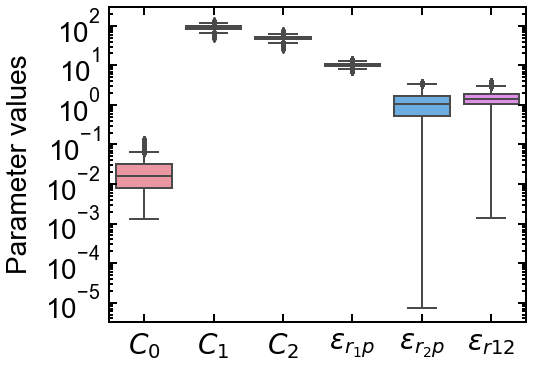

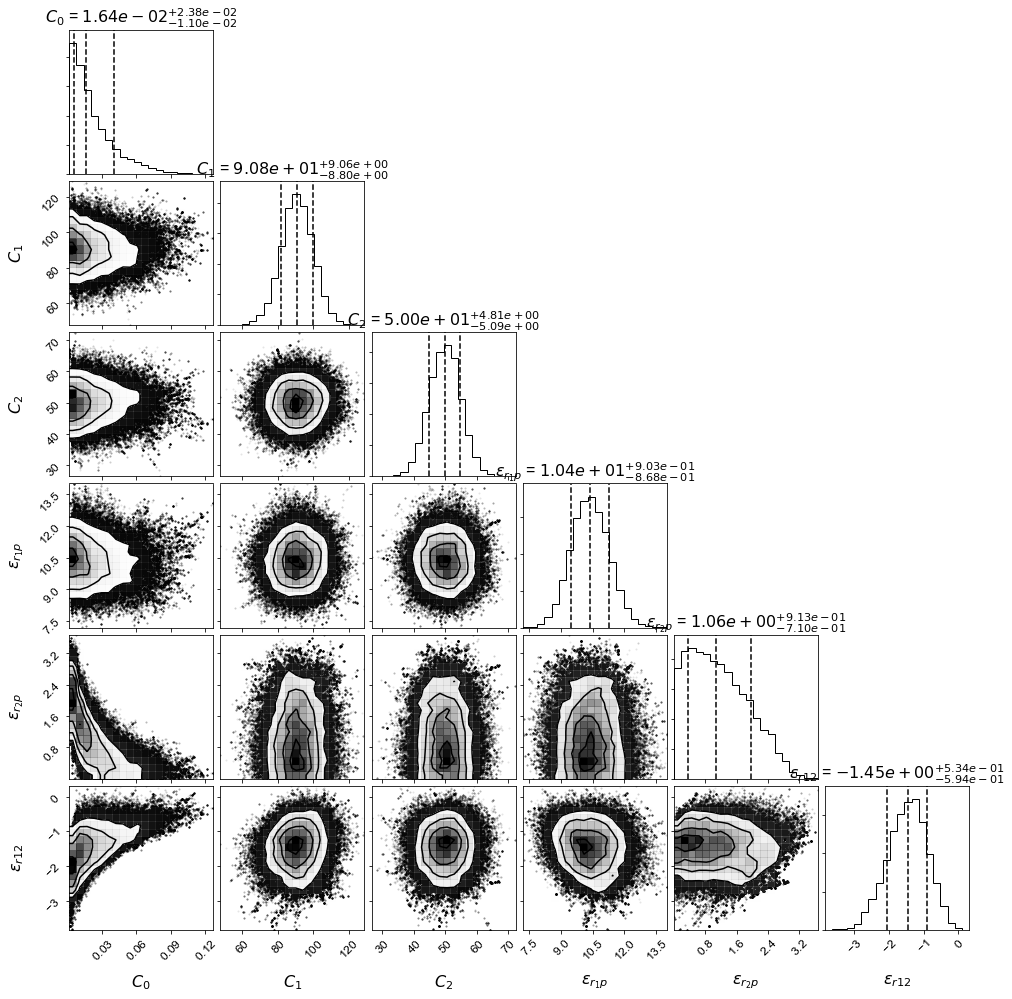

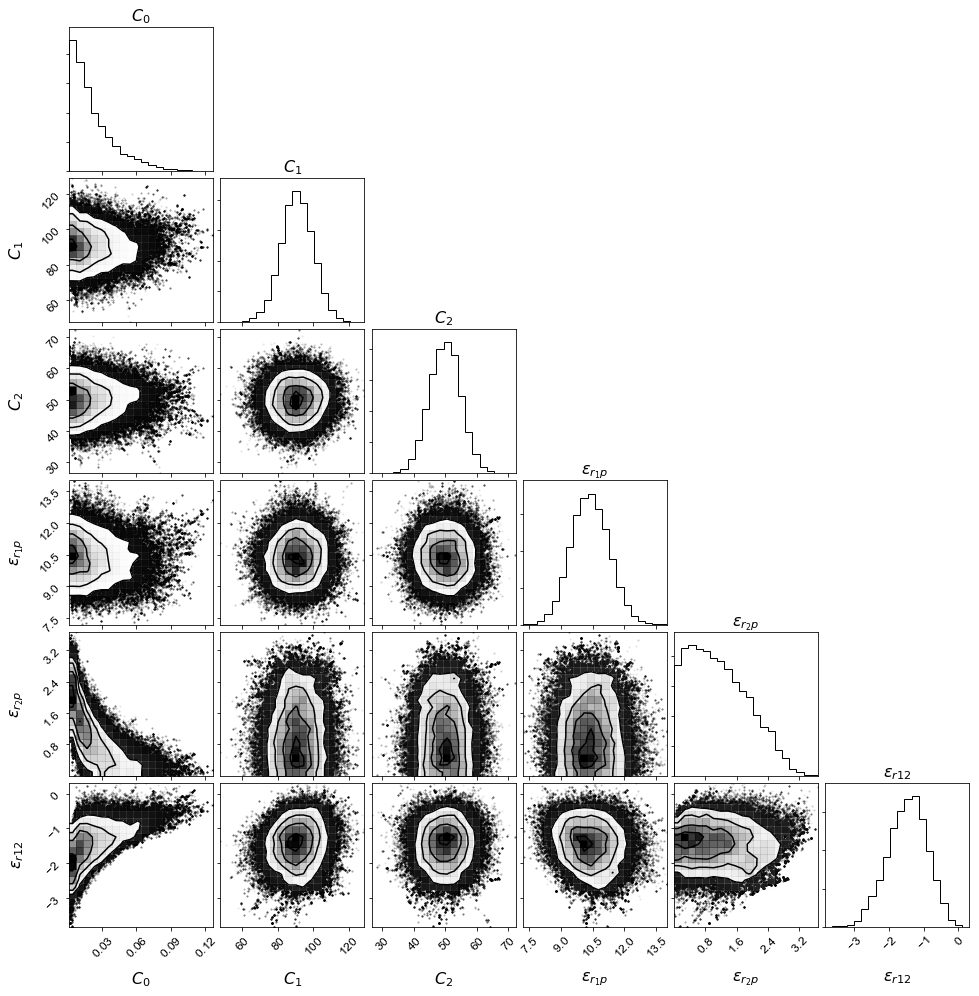

In [6]:
parameternames,nwalkers,iterations,tburn = ['$C_0$','$C_1$','$\epsilon_{rp}$'],50,10000,500
tuneplots('AAA',parameternames,nwalkers,iterations,tburn)

parameternames,nwalkers,iterations,tburn = ['$C_0$','$C_1$','$\epsilon_{rp}$'],50,10000,500
tuneplots('BCB',parameternames,nwalkers,iterations,tburn)

parameternames,nwalkers,iterations,tburn = ['$C_0$','$C_1$','$\epsilon_{rp}$','$\epsilon_{r12}$'],50,10000,500
tuneplots('AA_coop',parameternames,nwalkers,iterations,tburn)

parameternames,nwalkers,iterations,tburn = ['$C_0$','$C_1$','$C_2$','$\epsilon_{r_1p}$','$\epsilon_{r_2p}$','$\epsilon_{r12}$'],50,10000,500
tuneplots('heterodimerA',parameternames,nwalkers,iterations,tburn)